In [3]:
import pandas as pd

In [4]:
enron1 = pd.read_csv('./csv/enron1.csv')

In [5]:
import sys
sys.path.append('../Handlers')
from traintest import ClassificationModel, model_parameters
from preprocessing import EnronPreprocess, lemmatizing, vectorizing

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
enron1_preprocess = EnronPreprocess(enron1, "enron1")
enron1_preprocessed_X, enron1_preprocessed_y = enron1_preprocess.preprocess_data()

In [8]:
enron1_preprocessed_X = enron1_preprocessed_X.apply(lemmatizing)

In [9]:
enron1_preprocessed_countvec_X = vectorizing(enron1_preprocessed_X, "countvectorizer")

In [10]:
from sklearn.svm import SVC

svm = SVC()

In [11]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../Handlers')
import traintest

svm_model = traintest.ClassificationModel(svm, 'enron1')
svm_model.validation(enron1_preprocessed_countvec_X, enron1_preprocessed_y, save_model=True)

e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python Tests\AI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

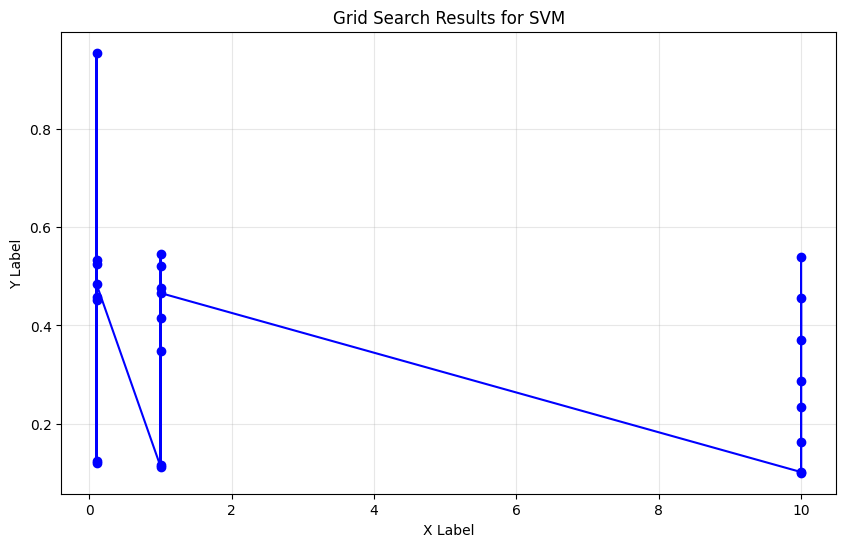

In [12]:
svm_model.plot_grid("param_C", "mean_score_time")

In [ ]:
import joblib
model = joblib.load('models/SVM_enron1_grid.joblib')
model.best_params_

SVC(C=0.1, kernel='linear')